# Pit Stop Data Analysis Notebook

In [30]:
import datetime
import re
from typing import List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from sklearn.utils import resample

import final_func as fn

In [31]:
# reload Module
import importlib
importlib.reload(fn)

<module 'final_func' from '/Users/andrewmo/Documents/Docs - Jupiter/Projects/Class Individuals/2022Spring_Finals/final_func.py'>

## Data Preparation

In [32]:
# Load data
pit = pd.read_csv('data/pit_stops.csv')
results = pd.read_csv('data/results.csv')
status = pd.read_csv('data/status.csv')

In [33]:
# Process the data files
merge_df = fn.merge_data([pit, results, status])
merge_df = fn.process_data(merge_df)
df_dict = fn.pit_stop_group(merge_df)

## Hypothesis 1

## Hypothesis 2

----------------------------------------------------------------------------------------
Total Pit Stops:  1
No.  1  pit stop:  mean =  0.416  std =  0.147
    66.9% within mean ± 1 std
    95.7% within mean ± 2 std


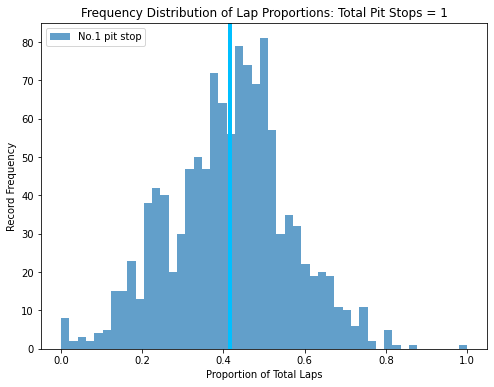

----------------------------------------------------------------------------------------
Total Pit Stops:  2
No.  1  pit stop:  mean =  0.252  std =  0.118
    71.7% within mean ± 1 std
    95.8% within mean ± 2 std
No.  2  pit stop:  mean =  0.62  std =  0.134
    72.9% within mean ± 1 std
    93.1% within mean ± 2 std


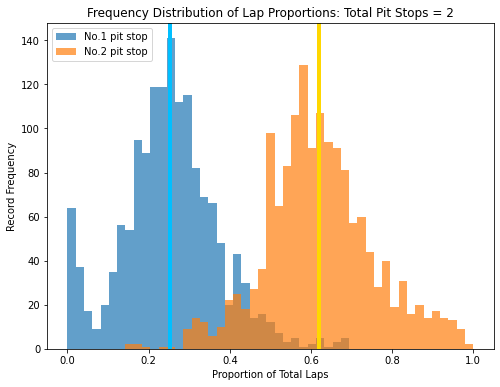

----------------------------------------------------------------------------------------
Total Pit Stops:  3
No.  1  pit stop:  mean =  0.174  std =  0.098
    66.6% within mean ± 1 std
    97.5% within mean ± 2 std
No.  2  pit stop:  mean =  0.427  std =  0.155
    74.4% within mean ± 1 std
    92.6% within mean ± 2 std
No.  3  pit stop:  mean =  0.698  std =  0.13
    74.9% within mean ± 1 std
    93.9% within mean ± 2 std


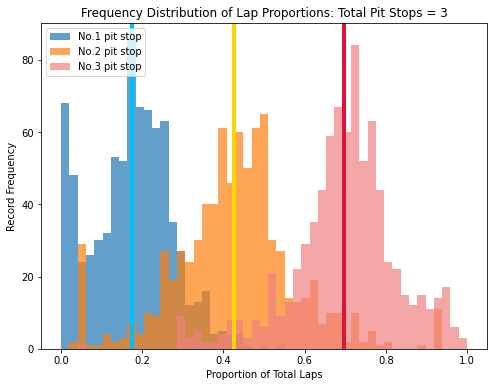

In [34]:
fn.distribution_plot(df_dict)

## Hypothesis 3

In [35]:
df_front, df_back = fn.front_back_division(merge_df, top_num=5)

----------------------------------------------------------------------------------------
Total Pits: 1, no.1 pit, p value=0.6120208311353951


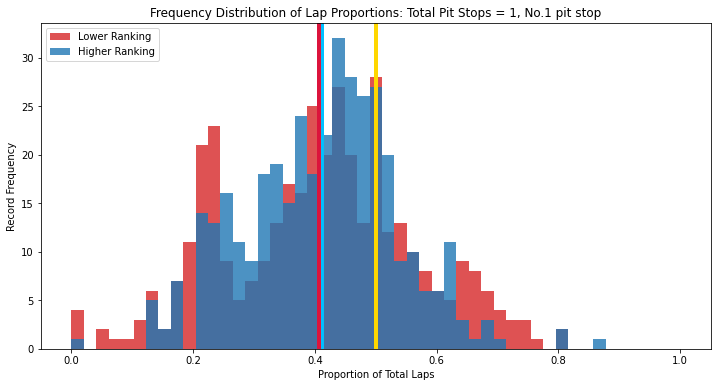

----------------------------------------------------------------------------------------
Total Pits: 2, no.1 pit, p value=0.06260995721012505


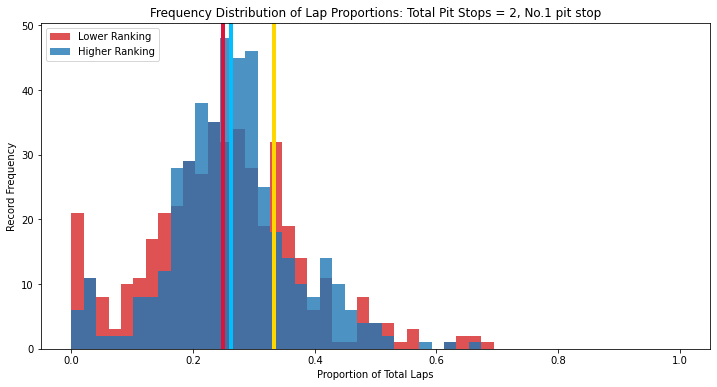

----------------------------------------------------------------------------------------
Total Pits: 2, no.2 pit, p value=0.2175452218698461


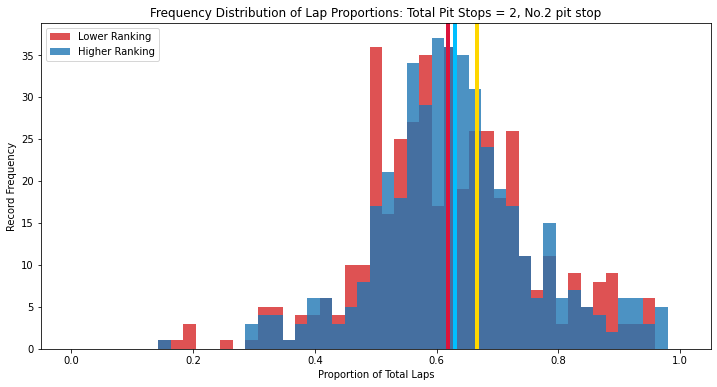

----------------------------------------------------------------------------------------
Total Pits: 3, no.1 pit, p value=0.045088810955493594


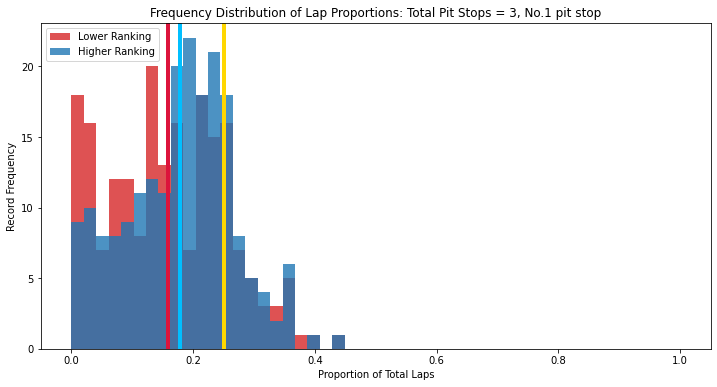

----------------------------------------------------------------------------------------
Total Pits: 3, no.2 pit, p value=0.005040876100088418


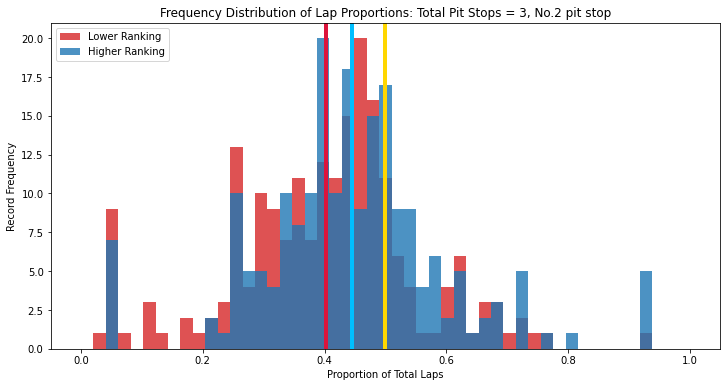

----------------------------------------------------------------------------------------
Total Pits: 3, no.3 pit, p value=0.0004646569255695769


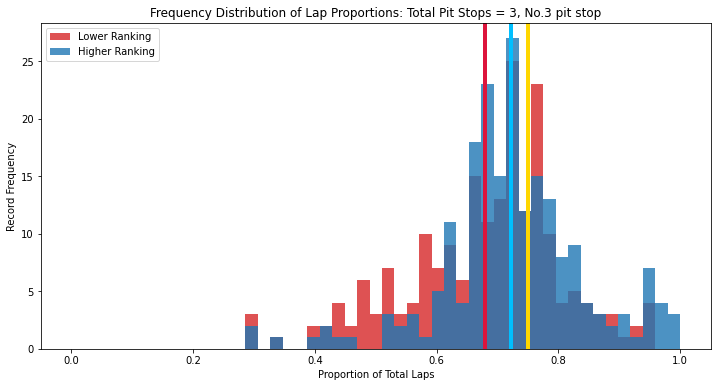

In [36]:
fn.comparison_plot(df_front,df_back)

In [37]:
df_front, df_back = fn.front_back_division(merge_df, select_col='abs_deviation_mean', top_num=5)

----------------------------------------------------------------------------------------
Mann-Whitney U rank test p value=0.0026914155012888615
     Mean of Average Deviations - 
        Higher Ranking: 0.122, Lower Ranking: 0.147
Higher ranking records have significantly lower mean deviations


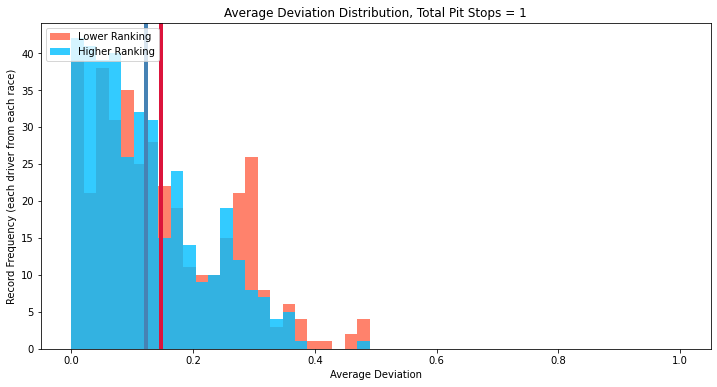

----------------------------------------------------------------------------------------
Mann-Whitney U rank test p value=0.006222420075629702
     Mean of Average Deviations - 
        Higher Ranking: 0.103, Lower Ranking: 0.118
Higher ranking records have significantly lower mean deviations


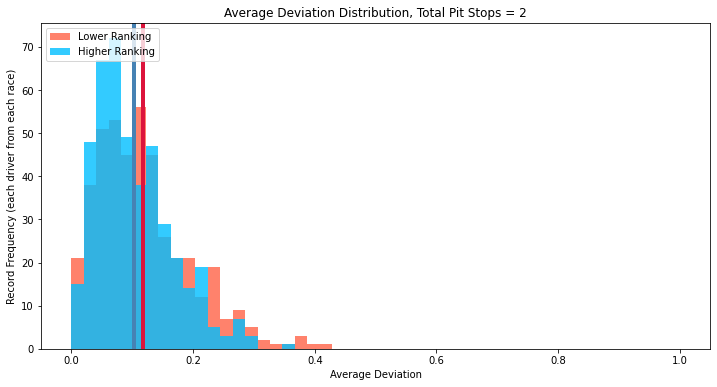

----------------------------------------------------------------------------------------
Mann-Whitney U rank test p value=0.02260220339545907
     Mean of Average Deviations - 
        Higher Ranking: 0.101, Lower Ranking: 0.121
Higher ranking records have significantly lower mean deviations


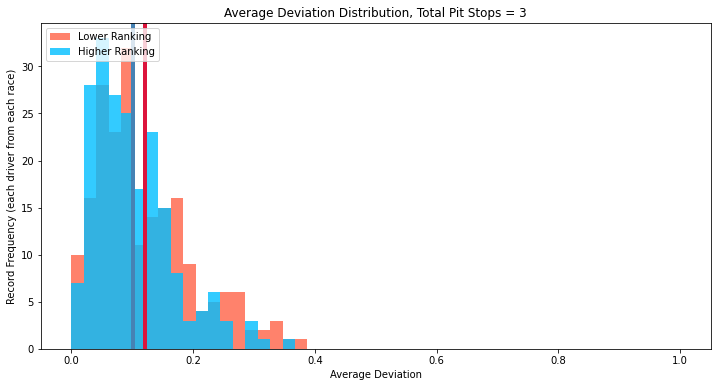

In [38]:
fn.err_mean_plot(df_front,df_back)